In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [7]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import LocalOutlierFactor

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv('defaultcreditclients.csv')

In [10]:
df = df.iloc[1:]

In [11]:
df=df.reset_index(drop=True)

In [12]:
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [13]:
y=df[['Y']]

In [14]:
X=df.iloc[:,:-1]

In [11]:
X.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23'],
      dtype='object')

In [15]:
rf0 = RandomForestClassifier(max_depth=3)

In [ ]:
# sel_rfe=features.columns[recl.support_] 
# nosel_rfe = [col for col in features.columns if col not in sel_rfe]
# nosel_rfe

In [16]:
selector = RFE(rf0, n_features_to_select=8, step=1)
selector = selector.fit(X, y)

In [17]:
X_1=X.iloc[:,selector.get_support(indices=True)]
X_1.shape

(30000, 8)

In [122]:
thresholder = VarianceThreshold(threshold=1)
X_high_variance = thresholder.fit_transform(X_1)
X_high_variance.shape

(30000, 15)

In [19]:
lof = LocalOutlierFactor(n_neighbors=10)
lof_result=lof.fit_predict(X_1)

In [20]:
len(lof_result)

30000

In [127]:
type(lof_result)

numpy.ndarray

In [130]:
np.where(lof_result==1)

(array([    3,     4,     5, ..., 29996, 29997, 29999], dtype=int64),)

In [21]:
X_new=X_1.iloc[np.where(lof_result==1)]

In [22]:
X_new.shape

(24785, 8)

In [23]:
y_new=y.iloc[np.where(lof_result==1)]

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
# ...     X, y, test_size=0.33, random_state=42, shuffle=True)

In [66]:
kfold = KFold(3, True, 42)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [71]:
scores = cross_validate(rf0, X, y, cv=kfold, scoring = 'f1_weighted')

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [72]:
scores

{'fit_time': array([3.88217854, 3.88457584, 3.97691679]),
 'score_time': array([0.23150206, 0.22439814, 0.22943115]),
 'test_score': array([0.79322144, 0.790763  , 0.80831823])}

In [77]:
skv = StratifiedKFold(n_splits=2, random_state=42, shuffle=True)

In [107]:
fprs, tprs = [], []
# for (train, test), i in zip(skv.split(X, y), range(3)):
for train_index, test_index in skv.split(X, y):
    X_train=X.loc[train_idx]
    X_test=X.loc[test_idx]
    y_train=y.loc[train_idx]
    y_test=y.loc[test_idx]
    rf0.fit(X_train,y_train)
    
    y_pred_proba = rf0.predict_proba(X_test)
    print()
    fpr, tpr, _ = roc_curve(y_test.astype(int),  y_pred_proba[:,1])
    fprs.append(fpr)
    tprs.append(tpr)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


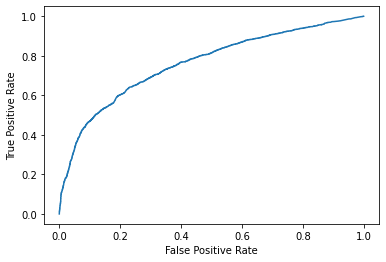

In [110]:
#create ROC curve
plt.plot(fprs[1],tprs[1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.33, random_state=42)

In [142]:
train_idx, test_idx = next(sss.split(X_new,y_new))

In [39]:
next(sss.split(X,y))

(array([ 2996, 19275,  4129, ...,  3794, 27565, 27126], dtype=int64),
 array([21530, 18768, 19462, ..., 12512, 13962, 19702], dtype=int64))

In [143]:
 for train_index, test_index in sss.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 2996 19275  4129 ...  3794 27565 27126] TEST: [21530 18768 19462 ... 12512 13962 19702]
TRAIN: [ 6090 13719 27652 ... 29505 12594 23488] TEST: [19476  1471 25184 ... 20318 12129  1702]


In [41]:
train_idx.shape

(20100,)

In [59]:
test_idx.shape

(9900,)

In [144]:
X_train=X.loc[train_idx]
X_test=X.loc[test_idx]
y_train=y.loc[train_idx]
y_test=y.loc[test_idx]

In [153]:
# y_train.value_counts(normalize=True)
#df[column_name].value_counts()
pd.value_counts(y_train.values.flatten(),normalize=True)

0    0.776509
1    0.223491
dtype: float64

In [48]:
rf = RandomForestClassifier(oob_score=True,max_depth=2, random_state=42, warm_start=True,n_jobs=-1)


oob_list=[]
for n_trees in [15,40,70]:
    rf.set_params(n_estimators=n_trees)
    rf.fit(X_train,y_train)
    
    oob_error=1-rf.oob_score_
    oob_list.append(pd.Series({'trees':n_trees,'oob':oob_error}))
    
rf_oob_df=pd.concat(oob_list,axis=1).T.set_index('trees')

rf_oob_df    

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: 

,oob
trees,
15.0,0.200647
40.0,0.199701
70.0,0.198159


In [145]:
rfe=rf.set_params(n_estimators=100)

y_pred=rfe.predict(X_test)

y_prob=rfe.predict_proba(X_test)

In [146]:
len(y_pred)

7633

In [147]:
print(classification_report(y_test.to_numpy(), y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5893
           1       0.71      0.16      0.26      1740

    accuracy                           0.79      7633
   macro avg       0.76      0.57      0.57      7633
weighted avg       0.78      0.79      0.74      7633



In [12]:
lr = LogisticRegression(random_state=0).fit(X, target)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
y_pred=lr.predict(X)
y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [14]:
y_pred.max()

'1'

In [15]:
y_true=target.to_numpy()

In [16]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     23364
           1       0.33      0.00      0.00      6636

    accuracy                           0.78     30000
   macro avg       0.56      0.50      0.44     30000
weighted avg       0.68      0.78      0.68     30000



In [148]:
#LabelEncoder().classes_
#data['Activity']
#data.Activity.unique()

In [ ]:
#GV_GBC=GridSearchCV(Gradient...)
#pickle
#GV_GBC.best_estimator_.learning_rate
#.predict(X) Call predict on the estimator with the best found parameters.

In [ ]:
#  from sklearn import svm, datasets
# >>> from sklearn.model_selection import GridSearchCV
# >>> iris = datasets.load_iris()
# >>> parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# >>> svc = svm.SVC()
# >>> clf = GridSearchCV(svc, parameters)
# >>> clf.fit(iris.data, iris.target)
# GridSearchCV(estimator=SVC(),
#              param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
# >>> sorted(clf.cv_results_.keys())
# ['mean_fit_time', 'mean_score_time', 'mean_test_score',...
#  'param_C', 'param_kernel', 'params',...
#  'rank_test_score', 'split0_test_score',...
#  'split2_test_score', ...
#  'std_fit_time', 'std_score_time', 'std_test_score']

In [1]:
#  from sklearn import datasets, svm
# >>> from sklearn.kernel_approximation import Nystroem
# >>> X, y = datasets.load_digits(n_class=9, return_X_y=True)
# >>> data = X / 16.
# >>> clf = svm.LinearSVC()
# >>> feature_map_nystroem = Nystroem(gamma=.2,
# ...                                 random_state=1,
# ...                                 n_components=300)
# >>> data_transformed = feature_map_nystroem.fit_transform(data)
# >>> clf.fit(data_transformed, y)
# LinearSVC()
# >>> clf.score(data_transformed, y)
#<-- correct except do split before 

In [2]:
#smote

In [3]:
#clf3=pl.Pipeline(steps=[('preprocessor',preprocessor),('smote',SMOTE(random state=42)),('classifier',LogisticRegression(solver='lbfgs'))])

In [4]:
# from collections import Counter
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split as tts
# from sklearn.decomposition import PCA
# from sklearn.neighbors import KNeighborsClassifier as KNN
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import Pipeline 
# X, y = make_classification(n_classes=2, class_sep=2,
# weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
# n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
# print(f'Original dataset shape {Counter(y)}')
# Original dataset shape Counter({1: 900, 0: 100})
# pca = PCA()
# smt = SMOTE(random_state=42)
# knn = KNN()
# pipeline = Pipeline([('smt', smt), ('pca', pca), ('knn', knn)])
# X_train, X_test, y_train, y_test = tts(X, y, random_state=42)
# pipeline.fit(X_train, y_train) 
# Pipeline(...)
# y_hat = pipeline.predict(X_test)
# print(classification_report(y_test, y_hat)

In [5]:
#tSNE plot

In [6]:
#one hot encoder
# enc.fit(X)
# enc.transform([['Female', 1], ['Male', 4]]).toarray()
# np.reshape(a, (3,-1))       # the unspecified value is inferred to be 2

In [14]:
df2=pd.DataFrame([['male',82,'graduate'],['female',56,'postgraduate'],['male',74,'graduate'],['female',67,'high school']])
df2.columns=['gender','weight','degree']

In [24]:
ohe = OneHotEncoder()
ohe2 = OneHotEncoder(drop='first')

In [17]:
df2.degree.values

array(['graduate', 'postgraduate', 'graduate', 'high school'],
      dtype=object)

In [18]:
df2.degree.values.reshape(-1, 1)

array([['graduate'],
       ['postgraduate'],
       ['graduate'],
       ['high school']], dtype=object)

In [20]:
ohe.fit_transform(df2.degree.values.reshape(-1, 1)).toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [26]:
ohe.fit(df2.degree.values.reshape(-1, 1))
ohe.categories_

[array(['graduate', 'high school', 'postgraduate'], dtype=object)]

In [27]:
ohe.get_feature_names()

array(['x0_graduate', 'x0_high school', 'x0_postgraduate'], dtype=object)

In [7]:
# a = np.array((1,2,3))
# b = np.array((2,3,4))
# np.dstack((a,b))
# array([[[1, 2],
#         [2, 3],
#         [3, 4]]])

In [8]:
# np.hstack([numeric_features, preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names()])

In [9]:
# import re

# phone_no = '(212)-456-7890'
# pattern = '\D'
# result = re.sub(pattern, '',phone_no)

# print(result)

In [ ]:
#ETL
#data.dtypes
#data.species.str.replace('Iris','') or data['species'].apply(;ambda x: x[5:]) #<-- slice string
#data.groubpy('species').mean()
#data.groubpy('species').agg([np.mean,np.median]) #<--or agg_dict
#agg_dict={field: ['mean','median'] for field in data.columns if field != 'species'}



In [ ]:
# ax=plt.axes()
# ax.scatter(data.sepal_length, data.sepal_width)

# ax.set(xlabel='sepal length (cm)',ylabel='Sepal Width (cm)', title='leaves')
#or simply
#data.petal_length.plot.hist(bins=25)


In [ ]:
# sns_set_context('notebook')
# ax = data.plot.hist(bins=25, alpha =0.5)
# ax.set_xlabel('size');

In [ ]:
#data.boxplot(by='species')

In [28]:
#df.drop(['PID','Order'],axis=1)
#num_cols=df.select_dtypes['number'].columns


In [29]:
#make_blobs

In [ ]:
#reshape!!

In [30]:
# mask = np.triu(np.ones_like(features.corr(), dtype=bool))
# tri_df = features.corr().mask(mask)
# to_drop_high=[c for c in tri_df.columns if any(tri_df[c] > abs(0.59))]
# to_drop_high

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=0)

In [25]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [26]:
pipe.score(X_test, y_test)

0.8194287558496046

In [27]:
pipe.classes_

array(['0', '1'], dtype=object)

In [29]:
# pipe.support_

In [30]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('svc', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'svc': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

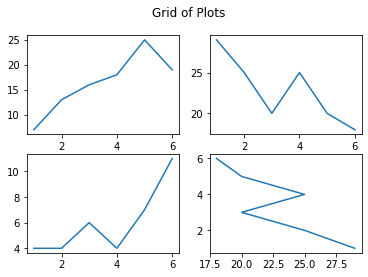

In [31]:
#create some data
var1 = [1, 2, 3, 4, 5, 6]
var2 = [7, 13, 16, 18, 25, 19]
var3 = [29, 25, 20, 25, 20, 18]
var4 = [4, 4, 6, 4, 7, 11]

#define grid of plots
fig, axs = plt.subplots(nrows=2, ncols=2)

#add title
fig.suptitle('Grid of Plots')

#add data to plots
axs[0, 0].plot(var1, var2)
axs[0, 1].plot(var1, var3)
axs[1, 0].plot(var1, var4)
axs[1, 1].plot(var3, var1)